# 构建区分类型分类的神经网络

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

# make fake data
n_data=torch.ones(100,2)
# print(n_data.size())
# print(n_data) 全1的[100,2]的二维tensor
x0=torch.normal(2*n_data,1)
y0=torch.zeros(100)
x1=torch.normal(-2*n_data,1)
y1=torch.zeros(100)

# cat合并数据
x=torch.cat((x0,x1),0).type(torch.FloatTensor)
y=torch.cat((y0,y1),).type(torch.LongTensor)

x,y=Variable(x),Variable(y)
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.out=torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.out(x)
        return x

In [3]:
net=Net(2,10,2)
net

Net(
  (hidden): Linear(in_features=2, out_features=10)
  (out): Linear(in_features=10, out_features=2)
)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


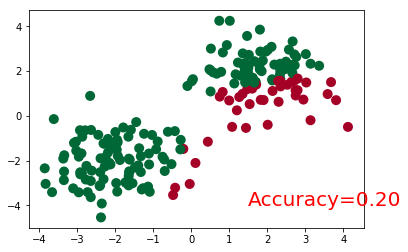

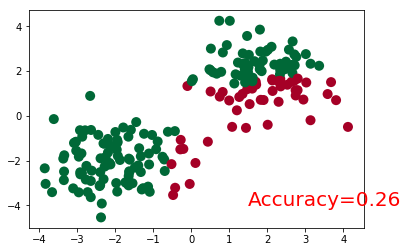

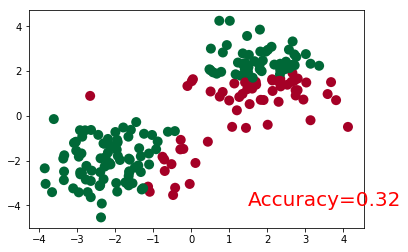

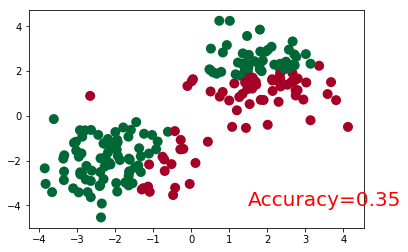

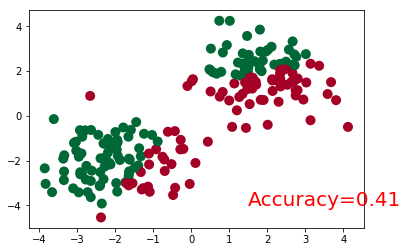

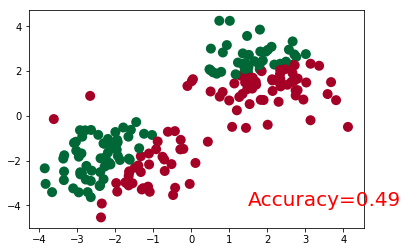

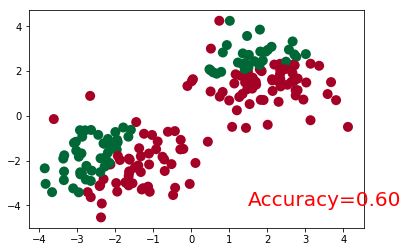

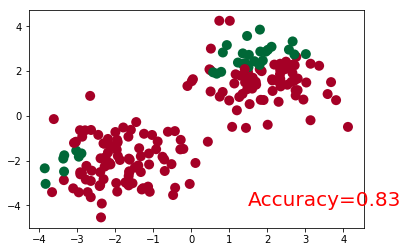

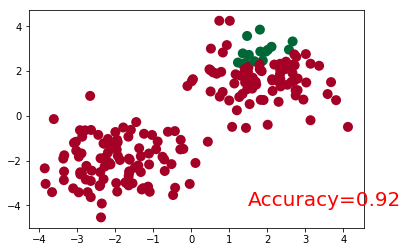

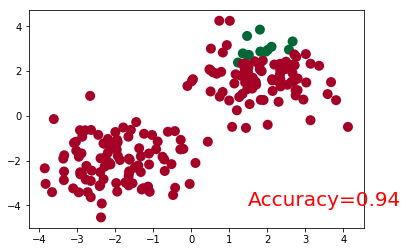

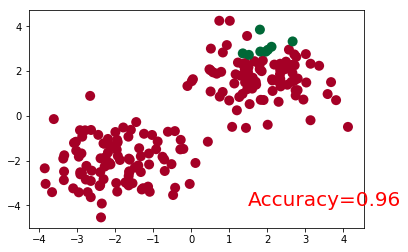

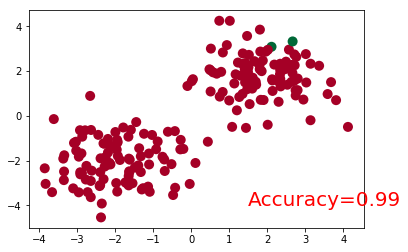

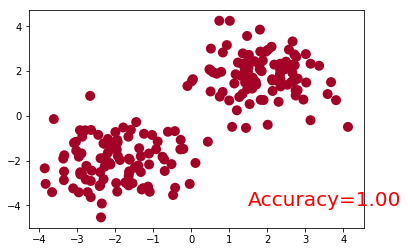

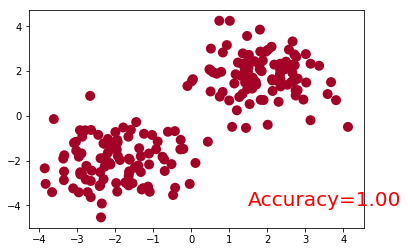

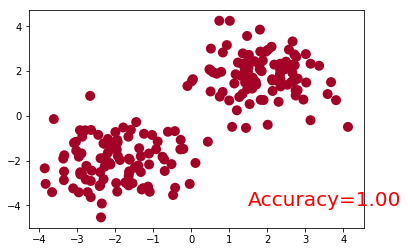

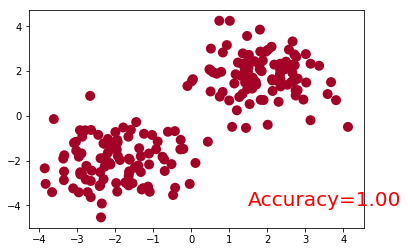

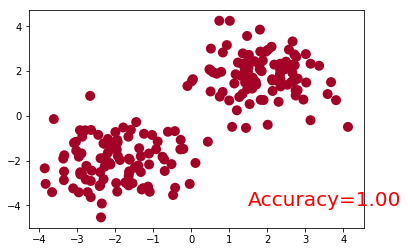

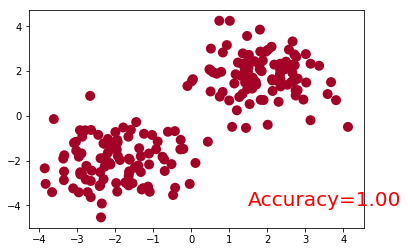

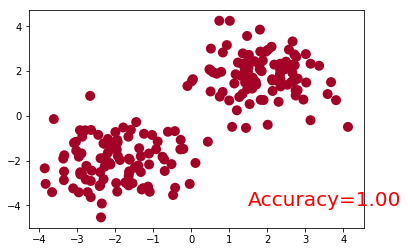

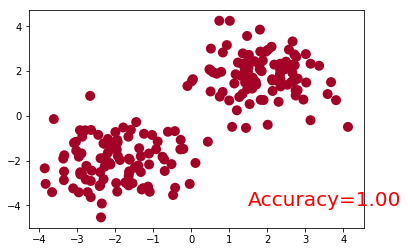

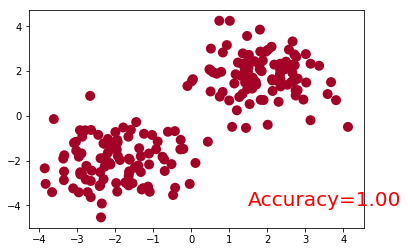

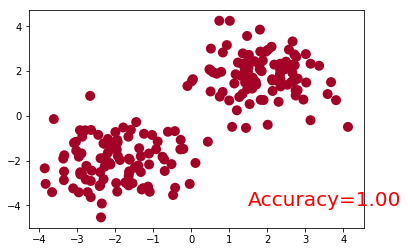

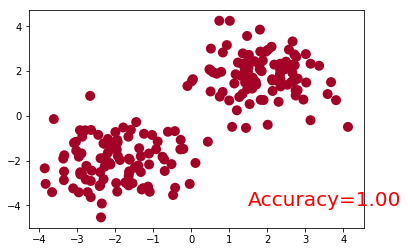

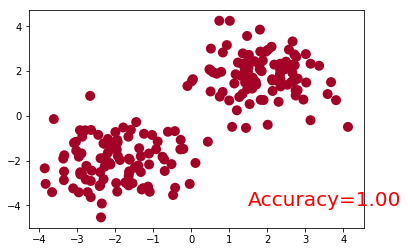

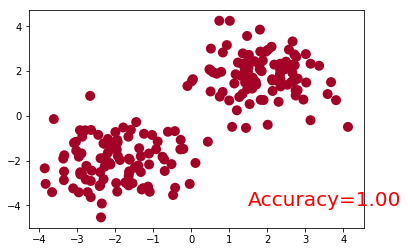

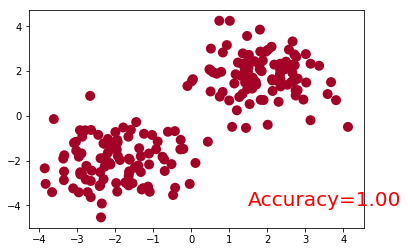

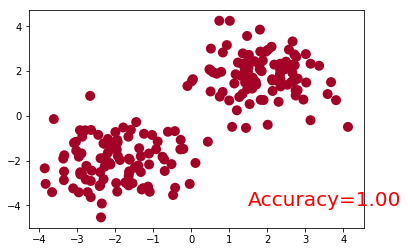

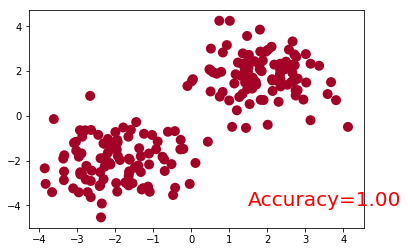

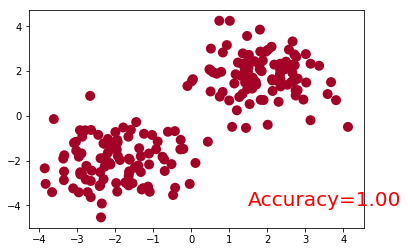

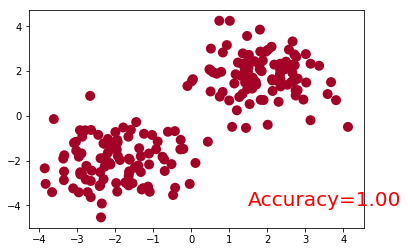

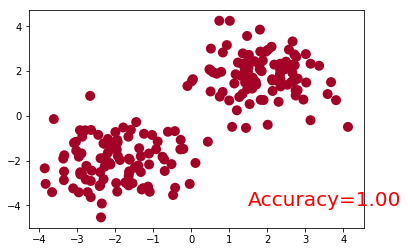

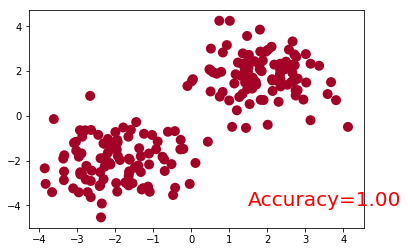

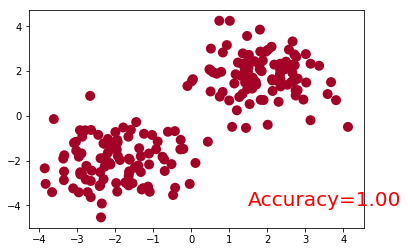

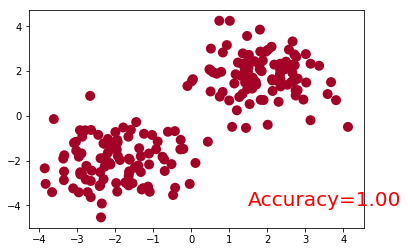

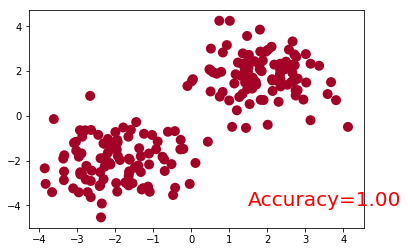

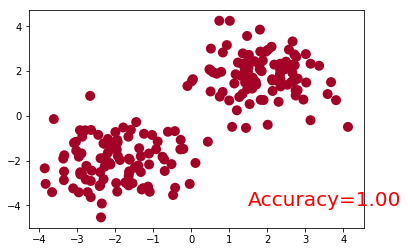

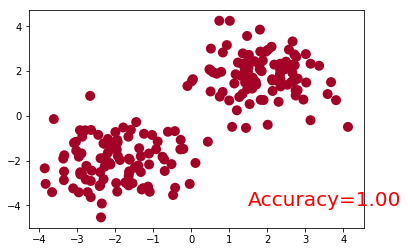

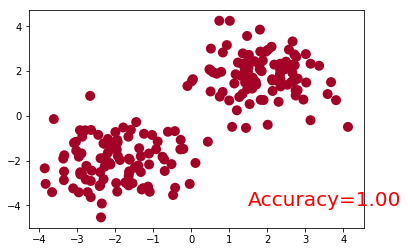

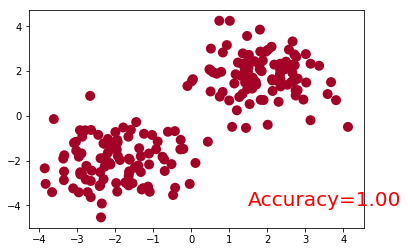

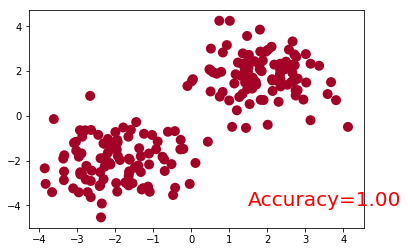

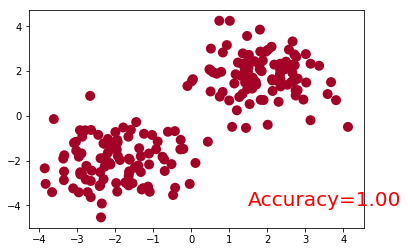

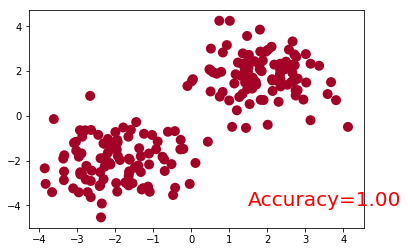

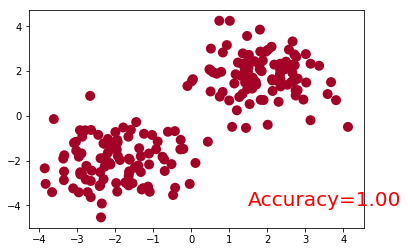

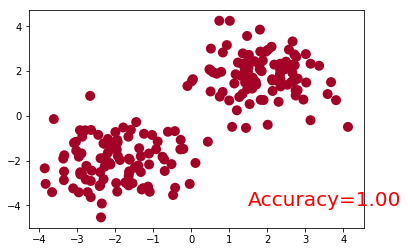

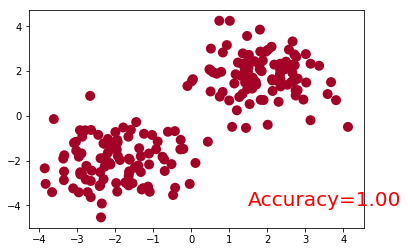

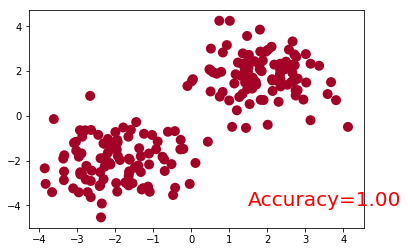

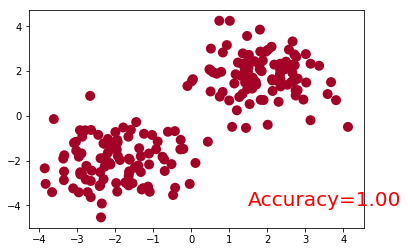

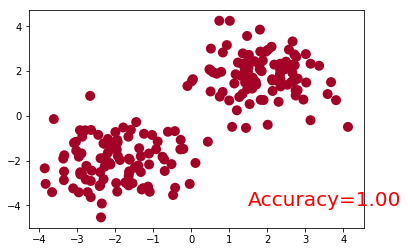

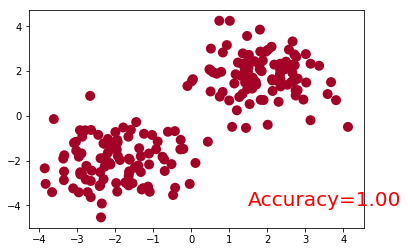

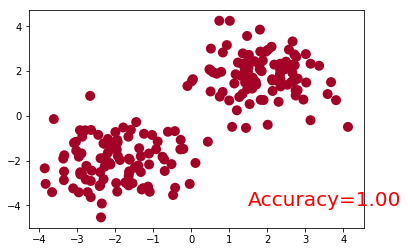

In [4]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.005)
loss_func=torch.nn.CrossEntropyLoss()

plt.ion()

for t in range(100):
    out=net(x)
    loss=loss_func(out,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%2==0:
        plt.cla()
        prediction=torch.max(F.softmax(out),1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()